In [1]:
import pandas as pd
import numpy as np
import re
import requests
from bs4 import BeautifulSoup
import json
from urllib.request import urlopen
import matplotlib.pyplot as plt


# CSV cleaning

In [2]:
df=pd.read_csv("../../CSV/nasdaq_historical_prices_daily.csv", encoding='latin1')

In [3]:
df.head(10) #Df content checking.

,ticker,date,open,high,low,close,volume
0,AAPL,2020-02-06,322.5700,325.22,320.2648,325.21,26214054
1,AAPL,2020-02-05,323.5200,324.76,318.9500,321.45,29384908
2,AAPL,2020-02-04,315.3100,319.64,313.6345,318.85,34154134
3,AAPL,2020-02-03,304.3000,313.49,302.2200,308.66,43496401
4,AAPL,2020-01-31,320.9300,322.68,308.2900,309.51,49897096
5,AAPL,2020-01-30,320.5435,324.09,318.7500,323.87,31685808
6,AAPL,2020-01-29,324.4500,327.85,321.3800,324.34,54149928
7,AAPL,2020-01-28,312.6000,318.40,312.1900,317.69,40558486
8,AAPL,2020-01-27,310.0600,311.77,304.8800,308.95,40485005
9,AAPL,2020-01-24,320.2500,323.33,317.5188,318.31,36634380


In [4]:
print(df.shape) 

(17165432, 7)


In [5]:
df.drop_duplicates() #Removing duplicates ----AfterCheck--->No even one duplicate.

,ticker,date,open,high,low,close,volume
0,AAPL,2020-02-06,322.57,325.22,320.2648,325.21,26214054
1,AAPL,2020-02-05,323.52,324.76,318.9500,321.45,29384908
2,AAPL,2020-02-04,315.31,319.64,313.6345,318.85,34154134
3,AAPL,2020-02-03,304.30,313.49,302.2200,308.66,43496401
4,AAPL,2020-01-31,320.93,322.68,308.2900,309.51,49897096
...,...,...,...,...,...,...,...
17165427,FXNC,2001-01-08,22.88,22.88,22.8800,22.88,0
17165428,FXNC,2001-01-05,22.88,22.88,22.8800,22.88,0
17165429,FXNC,2001-01-04,22.88,22.88,22.8800,22.88,0
17165430,FXNC,2001-01-03,22.88,22.88,22.8800,22.88,0


In [6]:
df.isnull().sum() #There is no nulls as well. Data seems to be quite clean.

ticker    0
date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [7]:
df2=pd.read_csv("../../CSV/nasdaq.csv", encoding='latin1') #I have research for another CVS in order to add some relevant info as hte company name              

In [8]:
df2=df2.rename(columns = {"Symbol":"ticker"}) #Rename column for merging

In [9]:
data=pd.merge(df2, df, on='ticker')  #Merge

In [10]:
data_filter=data[(data['date'] > '2014-12-31')] #I do filter out all rows that have dates outside of the last 5 years.

In [11]:
data_clean=data_filter.drop(['Watch Start','Date Added','Comment','volume'], axis=1) #Removing columns I do not need

In [12]:
data_clean

,ticker,Name,date,open,high,low,close
0,ATVI,Activision Blizzard Inc,2020-02-06,59.19,60.640,59.0000,60.260
1,ATVI,Activision Blizzard Inc,2020-02-05,60.14,60.140,58.4400,58.850
2,ATVI,Activision Blizzard Inc,2020-02-04,58.86,59.380,57.3700,59.210
3,ATVI,Activision Blizzard Inc,2020-02-03,58.64,58.900,58.0900,58.210
4,ATVI,Activision Blizzard Inc,2020-01-31,60.20,60.300,58.3469,58.480
...,...,...,...,...,...,...,...
387297,XLNX,Xilinx Inc.,2015-01-08,42.50,43.335,42.4500,43.135
387298,XLNX,Xilinx Inc.,2015-01-07,42.49,42.620,42.0700,42.195
387299,XLNX,Xilinx Inc.,2015-01-06,42.83,42.920,41.9700,42.180
387300,XLNX,Xilinx Inc.,2015-01-05,43.48,43.570,42.7550,42.795


# Getting data from API

In [13]:
#"https://financialmodelingprep.com/api/v3/stock/real-time-price" This website contains information about companies valuations in real time. 

In [14]:
def get_jsonparsed_data(url):
    response = urlopen(url)
    data = response.read().decode("utf-8")
    return json.loads(data)

url = ("https://financialmodelingprep.com/api/v3/stock/real-time-price")
realtime=get_jsonparsed_data(url)
print(type(realtime))

<class 'dict'>


In [15]:
#Making a df with the API response
valores=realtime.values()
lista_valores=[]
for e in valores:
    for i in e:
        lista_valores.append(i)
Today_values = pd.DataFrame(lista_valores)

In [16]:
Today_values["date"]="2020-04-12" #Adding date of the price to df


In [17]:
df3=pd.read_csv("../../CSV/nasdaqsymbol.csv", encoding='latin1')  #Adding a new CSV in order to have companies name from symbol

In [18]:
df3=df3.drop(['Watch Start', 'Date Added','Comment'],axis=1)  #I only keep symbol and company name
df3.drop_duplicates()
df3=df3.rename(columns = {"Symbol":"symbol"})

In [19]:
data_temp=pd.merge(df3,Today_values, on='symbol')  #Merge

In [20]:
data_temp=data_temp.rename(columns = {"name":"Name","symbol":"ticker","price":"open"}) #Raname for last merge with the original data_clean

In [21]:
data_final=pd.concat([data_temp,data_clean])  

In [22]:
data_final

,ticker,Name,open,date,high,low,close
0,ATVI,Activision Blizzard Inc,62.265,2020-04-12,NaN,NaN,NaN
1,ADBE,Adobe Systems Incorporated,318.710,2020-04-12,NaN,NaN,NaN
2,AKAM,Akamai Technologies Inc.,93.900,2020-04-12,NaN,NaN,NaN
3,ALXN,Alexion Pharmaceuticals Inc.,95.755,2020-04-12,NaN,NaN,NaN
4,GOOG,Alphabet Inc.,1201.700,2020-04-12,NaN,NaN,NaN
...,...,...,...,...,...,...,...
387297,XLNX,Xilinx Inc.,42.500,2015-01-08,43.335,42.450,43.135
387298,XLNX,Xilinx Inc.,42.490,2015-01-07,42.620,42.070,42.195
387299,XLNX,Xilinx Inc.,42.830,2015-01-06,42.920,41.970,42.180
387300,XLNX,Xilinx Inc.,43.480,2015-01-05,43.570,42.755,42.795


In [46]:
def company_info_pdf(company,date):                                             
    df2= data_final[(data_final['Name'].str.lower()==company.lower())&(data_final['date']==date)] 
    df2.plot.bar(table=True)
    

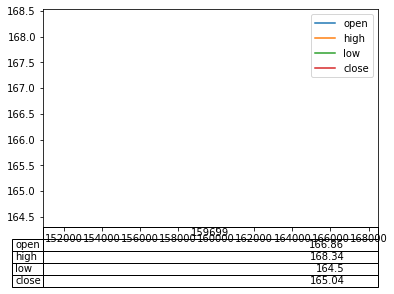

In [47]:
company_info_pdf("Facebook Inc.","2019-02-12")

In [23]:
#data_final.to_csv("../input/nasdaq_final.csv")